In [42]:
import numpy as np
import pandas as pd
import pprint
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn import tree
#from sklearn.datasets import load_digits
from IPython.display import display, HTML
#from sklearn.neighbors import KNeighborsClassifier
#from sklearn.metrics import classification_report
import math, time
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import learning_curve
from sklearn.model_selection import validation_curve
from sklearn.model_selection import StratifiedShuffleSplit
#from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score
#import tensorflow
#import tensorflow.keras as keras
#from tensorflow.keras.layers import Dense, Conv2D, Reshape, MaxPooling2D, Dropout, Flatten, Activation, BatchNormalization, ZeroPadding2D
#from sklearn.model_selection import GridSearchCV
#from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import Binarizer, StandardScaler
#from keras.regularizers import l2
#from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau



In [93]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

In [80]:
np.random.seed(0)
hyperparameters = {
    'tree': {

        'max_depth': [2, 4, 8, 16, 32, 64, 128, None],
        'min_samples_split':  [1, 2, 4, 8, 16, 32, 64, 128, 256, 512],
        'min_samples_leaf':  [1, 2, 4, 8, 16, 32, 64, 128, 256, 512],


    },
    'SVM': {
        'C': [0.1, 1, 10, 100],
        'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
        'kernel': ['rbf', 'linear', 'poly']
    },
    'KNN': {
        'n_neighbors': np.arange(1, 10, 1)
    },
    'adaboost': {
        'n_estimators': np.arange(1, 150, 10),

    }

}

In [81]:
def load_data():
    data_directory = "data/"
    filename = "diabetes.csv"
    df = pd.read_csv(data_directory + filename)
    
    plt.show()
    cols = list(df.columns.values)
    cols.remove('Outcome')
    X = (df[cols]).values
    y = df['Outcome'].values
    #scaler = StandardScaler()
    #scaler.fit(X)
    #X = scaler.transform(X)
    
    #plt.savefig("./output/label_count_mnist.png")
    return(X, y)

def split_data(X, y, data_size=1.0, train_size=0.8, strat=False):
    if strat:
        sss = StratifiedShuffleSplit(n_splits=1, random_state=0, train_size=train_size, test_size=train_size/4)
        for train_index, test_index in sss.split(X, y):
            print("hm")
            X_train = X[train_index]
            X_test = X[test_index]
            y_train, y_test = y[train_index], y[test_index]
    else:
        X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_size, test_size=train_size/4)
    return(X_train, y_train, X_test, y_test)


In [87]:
X, y = load_data()

In [88]:
X_train, X_holdout_test, y_train, y_holdout_test = train_test_split(X, y, test_size=0.2)
X_train, y_train, X_test, y_test = split_data(X_train, y_train, train_size=0.8)
X_train = StandardScaler().fit_transform(X_train)
print(X_train.shape)
print(X_test.shape)
print(X_holdout_test.shape)

(491, 8)
(123, 8)
(154, 8)


In [89]:



def plot_hyperparam_test(test_accs, train_accs, n_range, dataset, model_name, param_name, hist=False):

    plt.plot(n_range, train_accs, label = "train acc")
    plt.plot(n_range, test_accs, label = "test acc")
    plt.legend()

    plt.xlabel(param_name)
    plt.ylabel("test accuracy")
    title = "" + model_name + " score for " + param_name
    plt.title(title)
    plt.show()
    plt.savefig("./output/" + dataset + "-" + model_name + "-" + param_name + ".png")







In [90]:
#print(X_train)

#print(X_train)

# K means

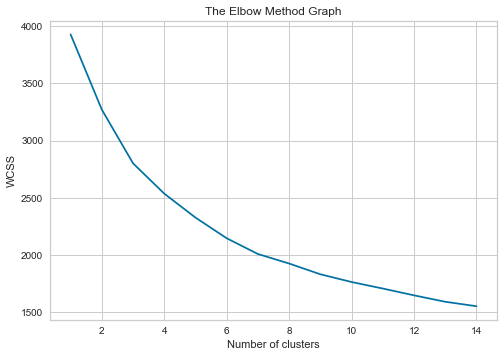

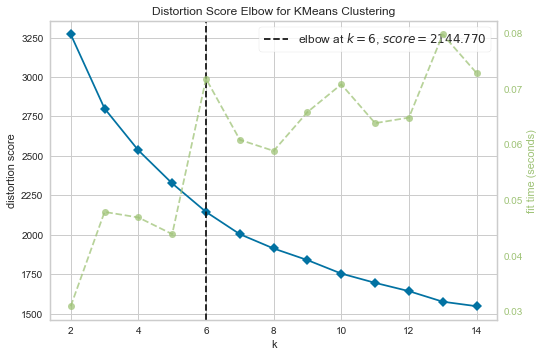

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [91]:
wcss = []
for i in range(1, 15):
    kmeans = KMeans(n_clusters=i, random_state=13)
    kmeans.fit(X_train)
    wcss.append(kmeans.inertia_) #sum of squared distances of samples to cluster center

plt.plot(range(1,15),wcss)
plt.title('The Elbow Method Graph')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,15))

visualizer.fit(X_train)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

For n_clusters = 2 The average silhouette_score is : 0.19001221809273314
For n_clusters = 3 The average silhouette_score is : 0.17234109694904368
For n_clusters = 4 The average silhouette_score is : 0.1889222672723143
For n_clusters = 5 The average silhouette_score is : 0.18227584901855712
For n_clusters = 6 The average silhouette_score is : 0.18884077858210993
For n_clusters = 7 The average silhouette_score is : 0.16271980387246957
For n_clusters = 8 The average silhouette_score is : 0.16302080711680725
For n_clusters = 9 The average silhouette_score is : 0.15367877247793812
For n_clusters = 10 The average silhouette_score is : 0.15208587602040716


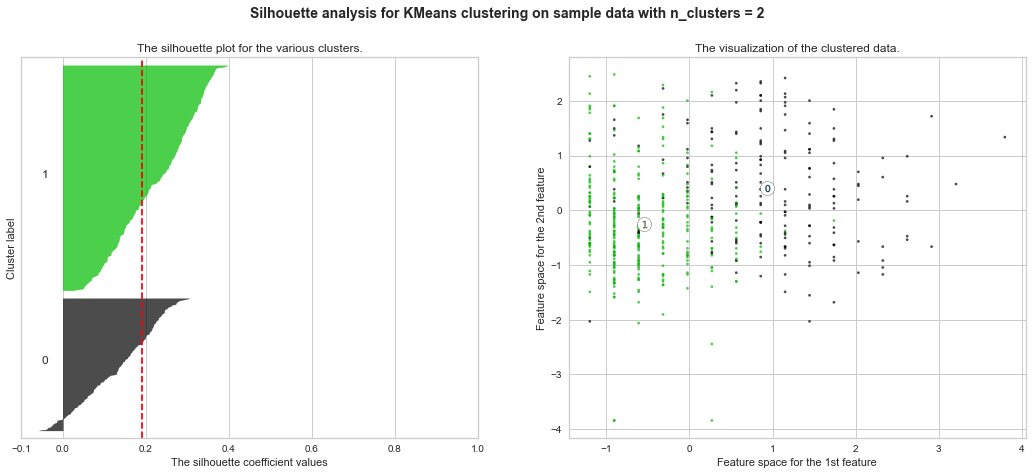

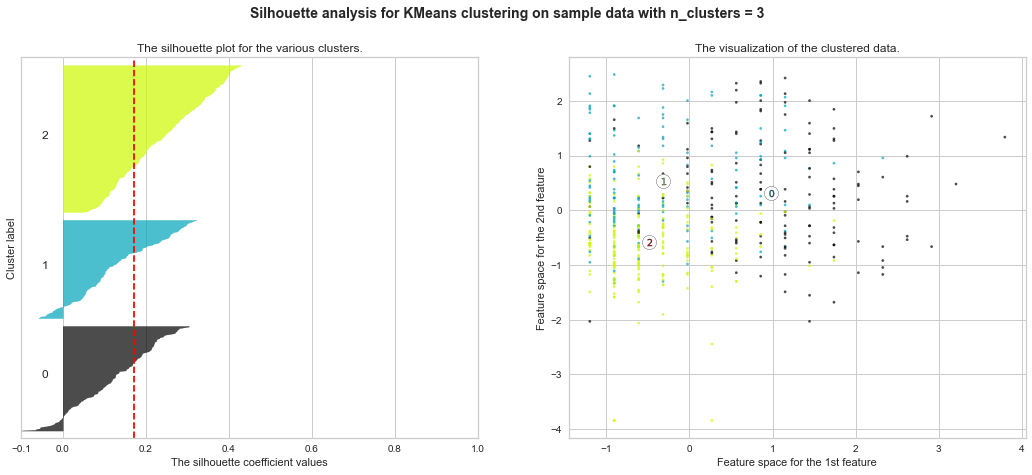

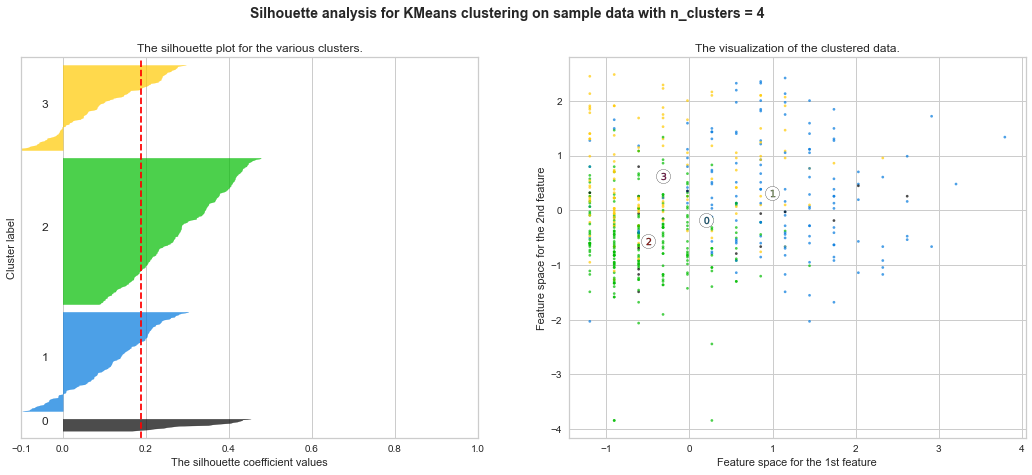

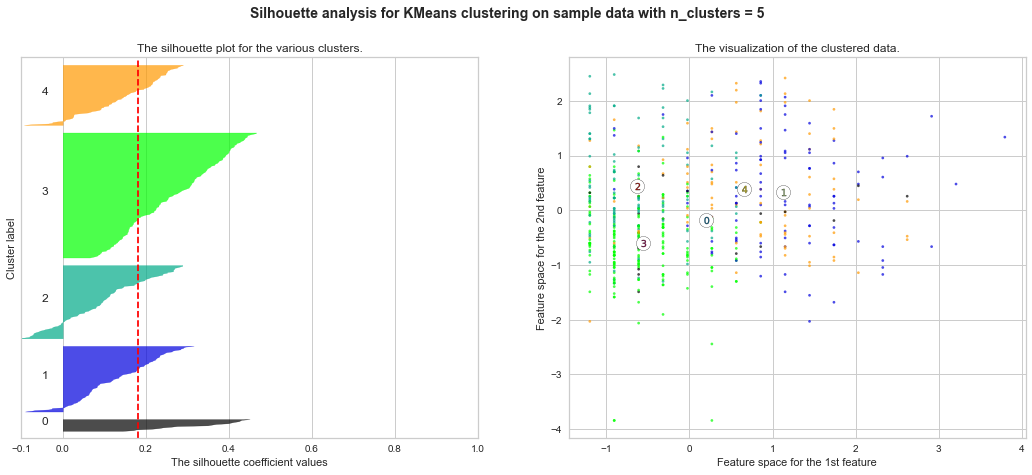

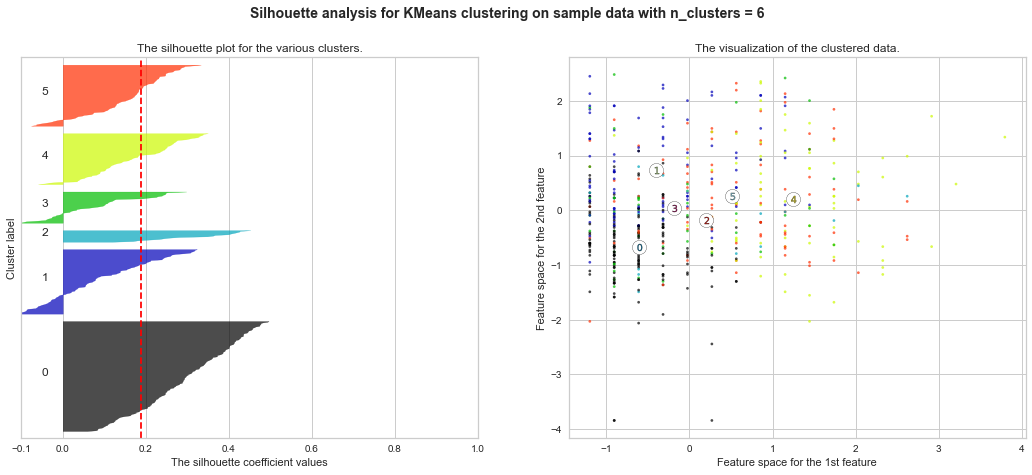

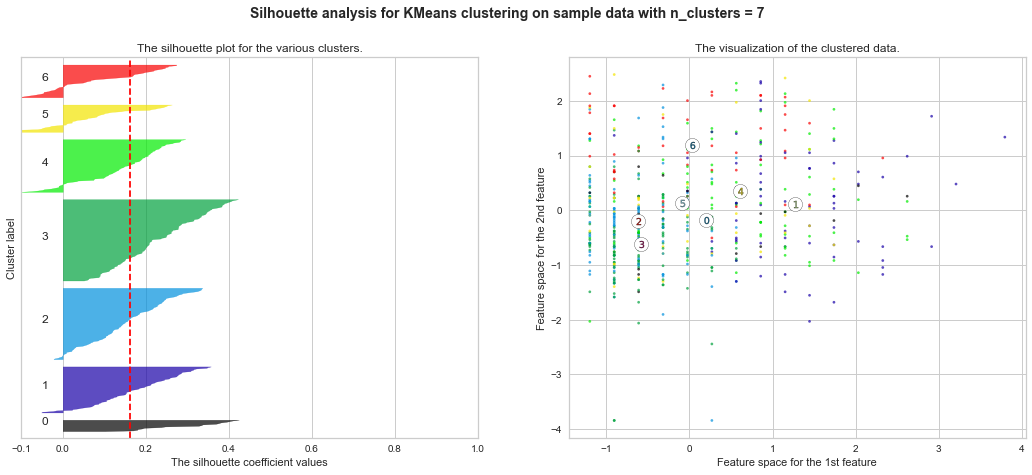

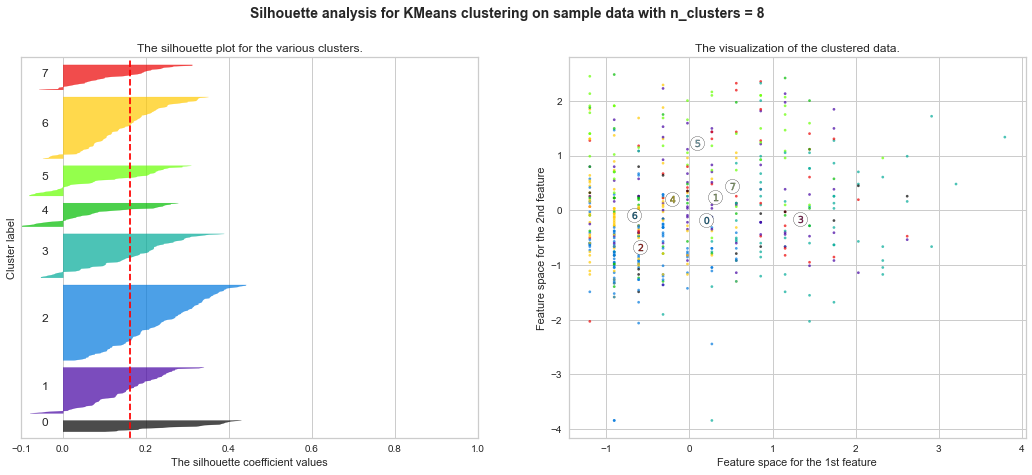

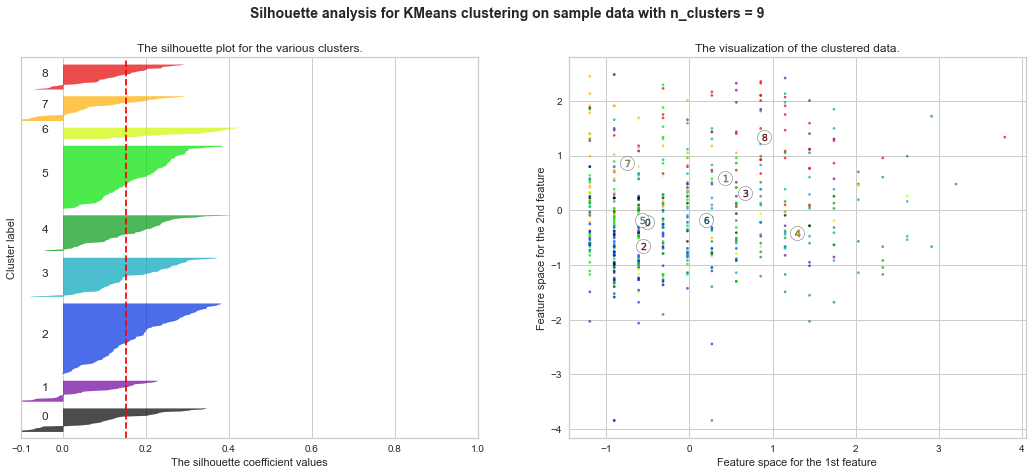

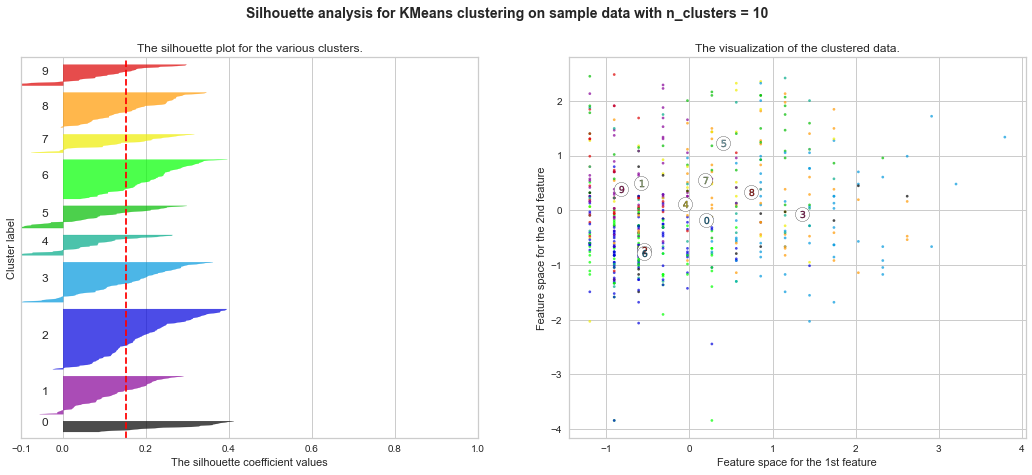

In [94]:
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X_train) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X_train)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X_train, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X_train, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X_train[:, 0], X_train[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

# Expectation Maximization

In [95]:
from sklearn.mixture import GaussianMixture as GMM

In [ ]:
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]
for i in range_n_clusters:
    gmm = GMM(random_state=13, n_clusters=i)
    labels = gmm.fit_predict(X_train)
    
    
    

c:\users\fuers\anaconda3\envs\ml\lib\site-packages\seaborn\axisgrid.py:1150: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(UserWarning(msg))
c:\users\fuers\anaconda3\envs\ml\lib\site-packages\seaborn\distributions.py:1134: UserWarning: cmap parameter ignored when using hue mapping.
  warnings.warn(msg, UserWarning)
c:\users\fuers\anaconda3\envs\ml\lib\site-packages\seaborn\distributions.py:1134: UserWarning: cmap parameter ignored when using hue mapping.
  warnings.warn(msg, UserWarning)
c:\users\fuers\anaconda3\envs\ml\lib\site-packages\seaborn\distributions.py:1134: UserWarning: cmap parameter ignored when using hue mapping.
  warnings.warn(msg, UserWarning)


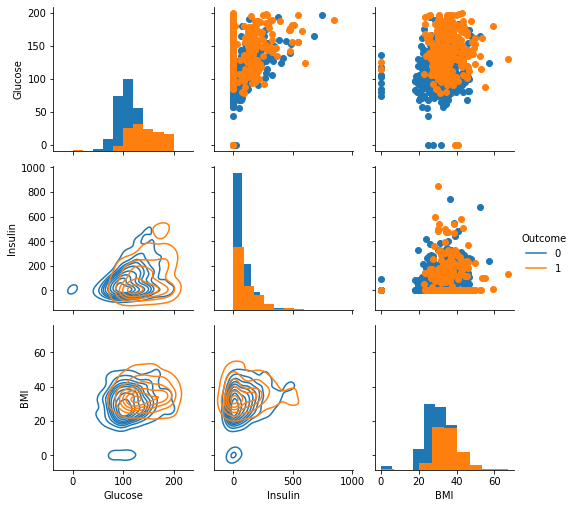

In [34]:
data = pd.read_csv('data/diabetes.csv')
g = sns.PairGrid(data, vars=['Glucose', 'Insulin', 'BMI'], hue="Outcome", size=2.4)
g.map_diag(plt.hist)
g.map_upper(plt.scatter)
g.map_lower(sns.kdeplot, cmap="Blues_d")
g.add_legend()
plt.show()

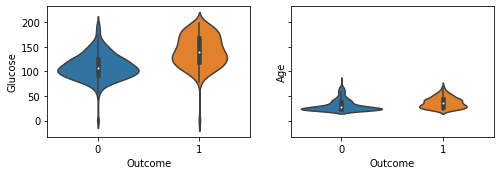

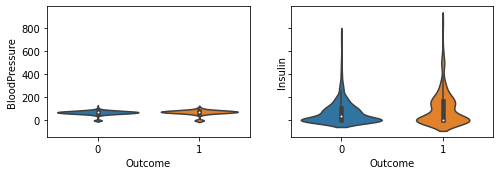

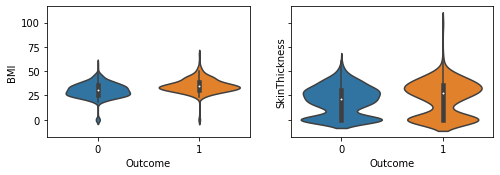

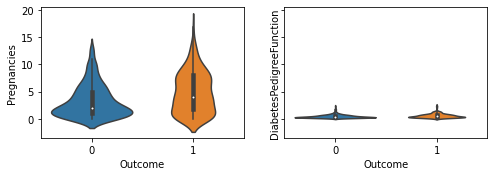

In [35]:
columns = ['Glucose', 'Age', 'BloodPressure', 'Insulin','BMI','SkinThickness' ,'Pregnancies',  'DiabetesPedigreeFunction']
n_cols = 2
n_rows = 4
idx = 0

for i in range(n_rows):
    fg,ax = plt.subplots(nrows=1,ncols=n_cols,sharey=True,figsize=(8, 2.4))
    for j in range(n_cols):
        sns.violinplot(x = data.Outcome, y=data[columns[idx]], ax=ax[j]) 
        idx += 1
        if idx >= 8:
            break

In [37]:
#data = data[data.SkinThickness!=data.SkinThickness.max()]

In [38]:
#def replace_zero(df, field, target):
#    mean_by_target = df.loc[df[field] != 0, [field, target]].groupby(target).mean()
#    data.loc[(df[field] == 0)&(df[target] == 0), field] = mean_by_target.iloc[0][0]
#    data.loc[(df[field] == 0)&(df[target] == 1), field] = mean_by_target.iloc[1][0]

    # run the function
#for col in ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']:   
#    replace_zero(data, col, 'Outcome')    

In [39]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,766.000000,766.000000,766.000000,766.000000,766.000000,766.000000,766.000000,766.000000,766.000000
mean,3.852480,121.522025,72.424258,29.049958,157.392517,32.408060,0.469198,33.214099,0.347258
std,3.370446,30.305707,12.119919,8.457181,88.959895,6.817977,0.324166,11.725782,0.476410
min,0.000000,44.000000,24.000000,7.000000,15.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.250000,64.000000,25.000000,122.000000,27.500000,0.243250,24.000000,0.000000
50%,3.000000,117.000000,72.000000,28.000000,130.287879,32.000000,0.370500,29.000000,0.000000
75%,6.000000,140.750000,80.000000,32.460674,208.341085,36.575000,0.625500,41.000000,1.000000
max,17.000000,199.000000,122.000000,60.000000,846.000000,67.100000,2.329000,81.000000,1.000000


In [40]:
X = data.iloc[:,:-1]
y = data.iloc[:, -1]

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=100)
print(X_train.shape)
print(X_test.shape)
print(y_train.size)
print(y_test.size)

(536, 8)
(230, 8)
536
230


# PCA

In [77]:
pca = PCA(n_components=4)
components = pca.fit_transform(X_train)

pdf = pd.DataFrame(data = components
             , columns = ['pc 1', 'pc 2', 'pc 3', 'pc 4'])
print(type(pdf))
print(type(y_train))
pdy = pd.DataFrame(data=y_train, columns=["labels"])
finalDf = pd.concat([pdf, pdy], axis = 1) #NM

#print(pca.explained_variance_ratio_)
#print(pca.singular_values_)

ValueError: Shape of passed values is (491, 7), indices imply (491, 4)

In [31]:
print(finalDf)

         pc 1      pc 2      pc 3      pc 4  labels
0    3.358388  0.892239 -0.219060 -0.240560       1
1   -0.085091  0.698358  0.920522  0.506396       1
2    0.325416  0.719394 -0.492707 -1.169087       1
3   -1.330352  0.219620  0.189993 -0.836665       0
4    1.401036  1.410145  0.037078  0.364598       0
..        ...       ...       ...       ...     ...
486  0.262392 -0.211170 -0.098617 -1.130637       0
487 -0.787537 -0.804633 -0.633514  0.366280       0
488 -0.792548 -1.433621 -0.628089 -0.467454       0
489 -0.962812 -1.324668  2.161590 -0.966643       1
490  2.087029  0.945098 -1.716098 -0.454624       1

[491 rows x 5 columns]


         pc 1      pc 2  labels
0    3.358388  0.892239       1
1   -0.085091  0.698358       1
2    0.325416  0.719394       1
3   -1.330352  0.219620       0
4    1.401036  1.410145       0
..        ...       ...     ...
486  0.262392 -0.211170       0
487 -0.787537 -0.804633       0
488 -0.792548 -1.433621       0
489 -0.962812 -1.324668       1
490  2.087029  0.945098       1

[491 rows x 3 columns]


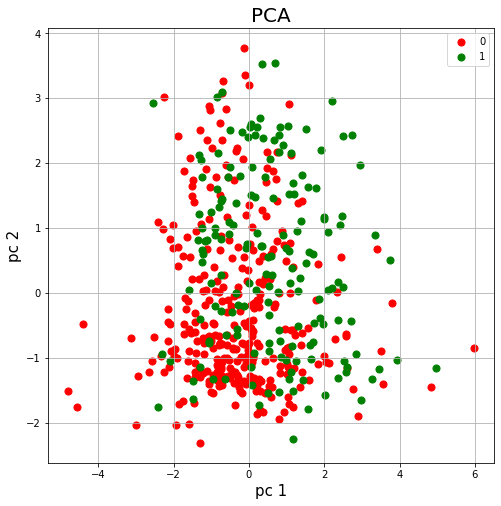

In [28]:

print(finalDf)
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('pc 1', fontsize = 15)
ax.set_ylabel('pc 2', fontsize = 15)
ax.set_title('PCA', fontsize = 20)
targets = [0, 1]
colors = ['r', 'g']
for target, color in zip(targets,colors):
    points_in_label = finalDf['labels'] == target
    ax.scatter(finalDf.loc[points_in_label, 'pc 1']
               , finalDf.loc[points_in_label, 'pc 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()



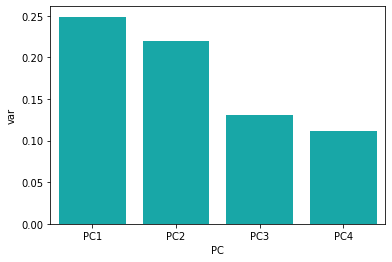

In [33]:
variance_ratio = pd.DataFrame({'var':pca.explained_variance_ratio_,
             'PC':['PC1','PC2', 'PC3', 'PC4']})
sns.barplot(x='PC',y="var", 
           data=variance_ratio, color="c");

In [10]:
pca = PCA(n_components=2, svd_solver='full')
pca.fit(X_train)

print(pca.explained_variance_ratio_)
print(pca.singular_values_)

[0.89640627 0.0583929 ]
[2673.18343203  682.27010432]


In [11]:
pca = PCA(n_components=2, svd_solver='arpack')
pca.fit(X_train)

print(pca.explained_variance_ratio_)
print(pca.singular_values_)

[0.89640627 0.0583929 ]
[2673.18343203  682.27010432]


In [41]:
params = {
    'n_neighbors': 1
}
n_range = np.arange(1, 100, 1)

test_accs, train_accs, best_metric = test_hyperparams(KNeighborsClassifier, 
                                                      n_range, 
                                                      params,
                                                      'n_neighbors' 
                                                     )
print(test_accs)
print(train_accs)
print(best_metric)

[76.42276422764228, 67.47967479674797, 73.98373983739837, 71.54471544715447, 74.79674796747967, 71.54471544715447, 72.35772357723577, 73.17073170731707, 74.79674796747967, 73.98373983739837, 76.42276422764228, 73.17073170731707, 75.60975609756098, 74.79674796747967, 75.60975609756098, 73.17073170731707, 75.60975609756098, 75.60975609756098, 78.04878048780488, 77.23577235772358, 77.23577235772358, 74.79674796747967, 75.60975609756098, 75.60975609756098, 76.42276422764228, 76.42276422764228, 77.23577235772358, 78.04878048780488, 78.04878048780488, 75.60975609756098, 77.23577235772358, 75.60975609756098, 75.60975609756098, 74.79674796747967, 74.79674796747967, 73.98373983739837, 75.60975609756098, 73.98373983739837, 75.60975609756098, 74.79674796747967, 75.60975609756098, 74.79674796747967, 74.79674796747967, 73.98373983739837, 73.98373983739837, 73.17073170731707, 74.79674796747967, 74.79674796747967, 74.79674796747967, 74.79674796747967, 74.79674796747967, 74.79674796747967, 74.79674796

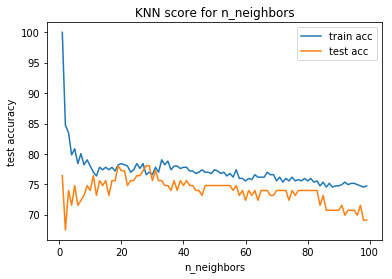

<Figure size 432x288 with 0 Axes>

In [42]:
n_range = np.arange(1, 100, 1)
plot_hyperparam_test(test_accs, train_accs, n_range,  "MNIST", "KNN", "n_neighbors")

In [44]:
model = KNeighborsClassifier(n_neighbors=29)
model.fit(X_train,y_train)
y_pred = model.predict(X_holdout_test)
knn_test_acc = metrics.accuracy_score(y_holdout_test, y_pred)
print(metrics.accuracy_score(y_holdout_test, y_pred))

0.6818181818181818


# Decision tree

In [45]:
tune_decision_tree(X_train, y_train, X_test, y_test)

Fitting 5 folds for each of 800 candidates, totalling 4000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1800s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done  61 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0329s.) Setting batch_size=4.
[Parallel(n_jobs=-1)]: Done  76 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 106 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0499s.) Setting batch_size=8.
[Parallel(n_jobs=-1)]: Done 152 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 224 tasks      | elapsed: 

0.8085539714867617
0.6829268292682927
{'min_samples_split': 4, 'min_samples_leaf': 32, 'max_depth': 4}


[Parallel(n_jobs=-1)]: Done 3161 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 3499 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done 3522 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done 3673 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done 3950 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done 3977 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done 4000 out of 4000 | elapsed:    2.9s finished


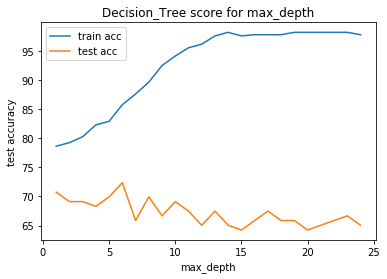

test acc:  [70.73170731707317, 69.10569105691057, 69.10569105691057, 68.29268292682927, 69.91869918699187, 72.35772357723577, 65.85365853658537, 69.91869918699187, 66.66666666666666, 69.10569105691057, 67.47967479674797, 65.04065040650406, 67.47967479674797, 65.04065040650406, 64.22764227642277, 65.85365853658537, 67.47967479674797, 65.85365853658537, 65.85365853658537, 64.22764227642277, 65.04065040650406, 65.85365853658537, 66.66666666666666, 65.04065040650406]
train acc:  [78.61507128309573, 79.22606924643586, 80.24439918533605, 82.28105906313645, 82.89205702647658, 85.74338085539715, 87.57637474541752, 89.61303462321793, 92.4643584521385, 94.09368635437882, 95.5193482688391, 96.13034623217924, 97.5560081466395, 98.16700610997964, 97.5560081466395, 97.75967413441956, 97.75967413441956, 97.75967413441956, 98.16700610997964, 98.16700610997964, 98.16700610997964, 98.16700610997964, 98.16700610997964, 97.75967413441956]
6


<Figure size 432x288 with 0 Axes>

In [60]:
params ={'max_depth': 6, 'min_samples_split': 4, 'min_samples_leaf': 1}
n_range = np.arange(1,25, 1)

test_accs, train_accs, best_metric = test_hyperparams(tree.DecisionTreeClassifier, 
                                                      n_range, 
                                                      params,
                                                      'max_depth' 
                                                     )

plot_hyperparam_test(test_accs, train_accs, n_range,  "MNIST", "Decision_Tree", "max_depth")
print("test acc: ", test_accs)
print("train acc: ", train_accs)
print(best_metric)

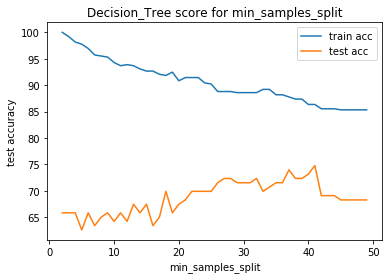

41


<Figure size 432x288 with 0 Axes>

In [61]:
n_range = np.arange(2, 50, 1)

test_accs, train_accs, best_metric = test_hyperparams(tree.DecisionTreeClassifier, 
                                                      n_range, 
                                                      params,
                                                      'min_samples_split' 
                                                     )

plot_hyperparam_test(test_accs, train_accs, n_range,  "MNIST", "Decision_Tree", "min_samples_split")
#print("test acc: ", test_accs)
#print("train acc: ", train_accs)
print(best_metric)

In [32]:
params['min_samples_split'] = 39

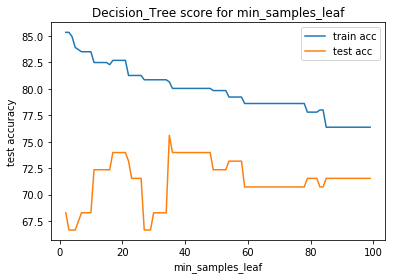

35


<Figure size 432x288 with 0 Axes>

In [63]:
n_range = np.arange(2, 100, 1)

test_accs, train_accs, best_metric = test_hyperparams(tree.DecisionTreeClassifier, 
                                                      n_range, 
                                                      params,
                                                      'min_samples_leaf' 
                                                     )

plot_hyperparam_test(test_accs, train_accs, n_range,  "MNIST", "Decision_Tree", "min_samples_leaf")
#print("test acc: ", test_accs)
#print("train acc: ", train_accs)
print(best_metric)

In [34]:
params['min_samples_leaf'] = 4

In [65]:
params ={'max_depth': 6,'min_samples_leaf':35}
clf = tree.DecisionTreeClassifier(**params)
clf = clf.fit(X_train, y_train)

y_pred = clf.predict(X_holdout_test)
print(metrics.accuracy_score(y_holdout_test, y_pred))
decision_tree_test_acc = metrics.accuracy_score(y_holdout_test, y_pred)

0.7012987012987013


# SVM

In [66]:
tune_SVM(X_train, y_train, X_test, y_test)

Fitting 5 folds for each of 75 candidates, totalling 375 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1917s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done  62 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0312s.) Setting batch_size=4.
[Parallel(n_jobs=-1)]: Done  88 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0668s.) Setting batch_size=8.
[Parallel(n_jobs=-1)]: Done 134 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0937s.) Setting batch_size=16.
[Parallel(n_jobs=-1)]: Done 202 

0.8065173116089613
0.7560975609756098
{'kernel': 'rbf', 'C': 100, 'gamma': 0.001}


[Parallel(n_jobs=-1)]: Done 375 out of 375 | elapsed:  8.7min finished


[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234
 235 236 237 238 239 240 241 242 243 244 245 246 24

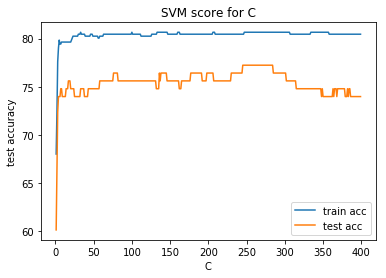

245


<Figure size 432x288 with 0 Axes>

In [75]:
#params = {
   # 'C': [0.1, 1, 10, 100, 1000],
  #  'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
 #   'kernel': ['rbf', 'linear', 'poly']
#}
params = {
    'C': 400,
    'gamma': 0.001,
    'kernel': 'rbf'
}
#0.1, 0.5,
n_range = [ 1, 2.5, 5, 7.5, 10]
n_range = np.arange(1, 400, 1)
print(n_range)
test_accs, train_accs, best_metric = test_hyperparams(SVC, 
                                                      n_range, 
                                                      params,
                                                      'C' 
                                                     )

plot_hyperparam_test(test_accs, train_accs, n_range,  "MNIST", "SVM", "C")
#print("test acc: ", test_accs)
#print("train acc: ", train_accs)
print(best_metric)
params['C'] = best_metric

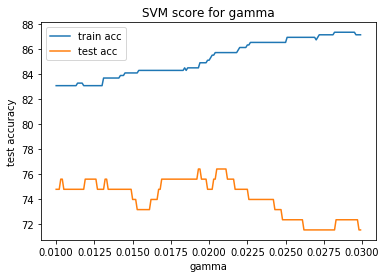

0.019299999999999942


<Figure size 432x288 with 0 Axes>

In [93]:
params = {
    'C': 400,
    'gamma': 0.001,
    'kernel': 'rbf'
}
n_range = [0.03, 0.02, 0.01, 0.001, 0.0001]
n_range = np.arange(0.01, 0.03, 0.0001)
test_accs, train_accs, best_metric = test_hyperparams(SVC, 
                                                      n_range, 
                                                      params,
                                                      'gamma' 
                                                     )

plot_hyperparam_test(test_accs, train_accs, n_range,  "MNIST", "SVM", "gamma")
#print("test acc: ", test_accs)
#print("train acc: ", train_accs)
print(best_metric)
params['gamma'] = best_metric

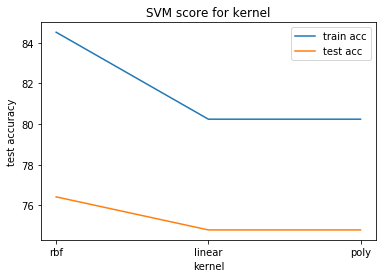

rbf


<Figure size 432x288 with 0 Axes>

In [105]:
n_range = ['rbf', 'linear', 'poly']
test_accs, train_accs, best_metric = test_hyperparams(SVC, 
                                                      n_range, 
                                                      params,
                                                      'kernel' 
                                                     )

plot_hyperparam_test(test_accs, train_accs, n_range,  "MNIST", "SVM", "kernel")
#print("test acc: ", test_accs)
#print("train acc: ", train_accs)
print(best_metric)
params['kernel'] = best_metric

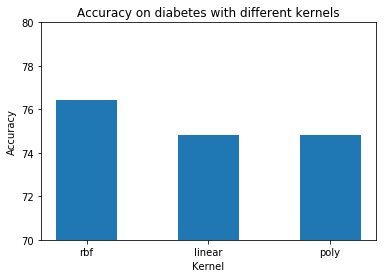

[76.42276422764228, 74.79674796747967, 74.79674796747967]


<Figure size 432x288 with 0 Axes>

In [109]:
plt.bar(n_range, test_accs, width=0.5)
plt.xlabel("Kernel")
plt.ylabel("Accuracy")
plt.title("Accuracy on diabetes with different kernels")
axes = plt.gca()
axes.set_ylim([70,80])

plt.show()
plt.savefig("./output/kernel_bars_mnist.png")
print(test_accs)

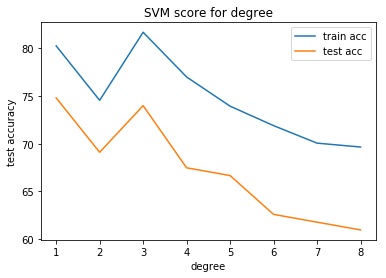

test acc:  [74.79674796747967, 69.10569105691057, 73.98373983739837, 67.47967479674797, 66.66666666666666, 62.601626016260155, 61.78861788617886, 60.97560975609756]
1


<Figure size 432x288 with 0 Axes>

In [101]:
params['kernel'] = 'poly'
params['degree'] = 1

n_range = np.arange(1, 9, 1)
test_accs, train_accs, best_metric = test_hyperparams(SVC, 
                                                      n_range, 
                                                      params,
                                                      'degree' 
                                                     )

plot_hyperparam_test(test_accs, train_accs, n_range,  "MNIST", "SVM", "degree")
print("test acc: ", test_accs)
#print("train acc: ", train_accs)
print(best_metric)
params['degree'] = best_metric

In [110]:
params['kernel'] = 'rbf'

clf = SVC(**params)
clf = clf.fit(X_train, y_train)

y_pred = clf.predict(X_holdout_test)
print(metrics.accuracy_score(y_holdout_test, y_pred))
svm_test_acc = metrics.accuracy_score(y_holdout_test, y_pred)

0.6753246753246753


# ADABOOST

In [111]:
tune_adaboost(X_train, y_train, X_test, y_test)

Fitting 5 folds for each of 600 candidates, totalling 3000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done  61 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done  74 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done  89 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 104 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done 121 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done 157 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done 197 tasks      | elapsed:  

1.0
0.7317073170731707
{'base_estimator__criterion': 'gini', 'base_estimator__max_depth': 6, 'base_estimator__splitter': 'best', 'n_estimators': 111}


[Parallel(n_jobs=-1)]: Done 3000 out of 3000 | elapsed:   49.3s finished


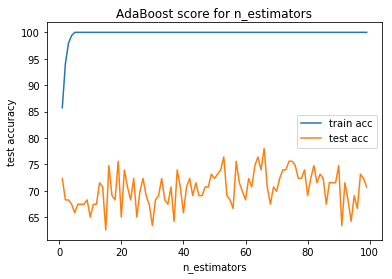

66


<Figure size 432x288 with 0 Axes>

In [117]:
#params ={'max_depth': 6, 'min_samples_split': 4, 'min_samples_leaf': 1}
base_estimator = tree.DecisionTreeClassifier(max_depth=4, min_samples_split=4)
params = {'n_estimators': 111, 'base_estimator':base_estimator}

n_range = np.arange(1, 100, 1)
test_accs, train_accs, best_metric = test_hyperparams(AdaBoostClassifier, 
                                                      n_range, 
                                                      params,
                                                      'n_estimators' 
                                                     )

plot_hyperparam_test(test_accs, train_accs, n_range,  "MNIST", "AdaBoost", "n_estimators")
#print("test acc: ", test_accs)
#print("train acc: ", train_accs)
print(best_metric)
params['n_estimators'] = best_metric

In [89]:
print("test acc: ", test_accs)

test acc:  [75.453446191052, 85.36880290205562, 88.27085852478838, 89.35912938331319, 90.81015719467956, 91.41475211608223, 91.53567110036276, 92.86577992744861, 93.47037484885126, 93.10761789600967, 93.5912938331318, 92.62394195888754, 93.5912938331318, 93.10761789600967, 94.19588875453447]


In [132]:
params = {"base_estimator__criterion" : ["gini", "entropy"],
                  "base_estimator__splitter" :   ["best", "random"],
                  "base_estimator__max_depth" :   np.arange(2, 12, 1),
                  "n_estimators": np.arange(1, 150, 10)
                 }


  
clf = AdaBoostClassifier(base_estimator=tree.DecisionTreeClassifier(max_depth=8), n_estimators=250)
clf.fit(X_train, y_train)                                                                     
y_pred = clf.predict(X_holdout_test)
print(metrics.accuracy_score(y_holdout_test, y_pred))
adaboost_test_acc = metrics.accuracy_score(y_holdout_test, y_pred)

0.6883116883116883


# CNN

In [11]:
from keras.applications.vgg16 import VGG16, preprocess_input


Using TensorFlow backend.


In [84]:
#num_category = 10 

#y_train_oh = keras.utils.to_categorical(y_train, num_category)
#y_test_oh = keras.utils.to_categorical(y_test, num_category)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_32 (Dense)             (None, 32)                25120     
_________________________________________________________________
dense_33 (Dense)             (None, 10)                330       
Total params: 25,450
Trainable params: 25,450
Non-trainable params: 0
_________________________________________________________________


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_54 (Dense)             (None, 8)                 72        
_________________________________________________________________
dense_55 (Dense)             (None, 8)                 72        
_________________________________________________________________
batch_normalization_13 (Batc (None, 8)                 32        
_________________________________________________________________
dense_56 (Dense)             (None, 16)                144       
_________________________________________________________________
dropout_13 (Dropout)         (None, 16)                0         
_________________________________________________________________
dense_57 (Dense)             (None, 1)                 17        
Total params: 337
Trainable params: 321
Non-trainable params: 16
_________________________________________________________________


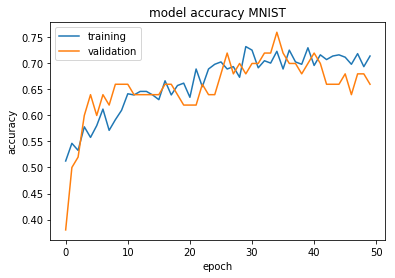

Test loss:  0.7604246236444488
Test accuracy:  0.7479674859744746


In [32]:
model = keras.models.Sequential()
model.add(Dense(8, activation='relu', kernel_regularizer=l2(.1), input_dim = X_train.shape[1]))
model.add(Dense(8, activation='relu', kernel_regularizer=l2(.05)))
model.add(BatchNormalization())
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.75))
model.add(Dense(1, activation='sigmoid'))
opt = keras.optimizers.Adam(lr=0.001)
loss_fn = keras.losses.binary_crossentropy

model.compile(loss=loss_fn,
                  optimizer=opt,
                  metrics=['accuracy'])
model.summary()

history = model.fit(X_train, y_train, batch_size=16, epochs=50, verbose=False, validation_split=.1)
loss, accuracy  = model.evaluate(X_test, y_test, verbose=False)

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy MNIST')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()

print('Test loss: ', loss)
print('Test accuracy: ', accuracy)
